### Student Information
Name:林守凡 Shou-Fan Lin

Student ID:114062604

GitHub ID:linshoufan

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [117]:
### Begin Assignment Here

In [2]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [4]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/linshoufan/Documents/清大/資料探勘與應用/hw1/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (main, Sep 21 2025, 19:05:57) [Clang 15.0.0 (clang-1500.3.9.4)]


## 1.Data preparation

In [5]:
#categories
categories = ['StockMarket',
              'stocks',
              'stockstobuytoday',
              'wallstreetbets']

In [6]:
# only need subreddit, text, label field
DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(DATA_PATH)
df = df[['subreddit', 'text', 'label']]
df = df.rename(columns={'subreddit': 'category_name', 'text': 'text', 'label': 'label'})

# turn into list
text = df['text'].tolist()
category_name = df['category_name'].tolist()
label = df['label'].tolist()

# use dict to store the data
reddit_dataset = {
    "text": text,
    "label": label,
    "category_name": category_name
}

In [7]:
reddit_dataset["text"][0:3]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.',
 'Seeing lots of red in the ticker.']

In [8]:
reddit_dataset["category_name"][0:3]

['wallstreetbets', 'wallstreetbets', 'StockMarket']

In [9]:
reddit_dataset["label"][0:3]

[-1.0, 0.0, 0.0]

In [10]:
len(reddit_dataset["text"])

847

In [11]:
len(reddit_dataset["category_name"])

847

In [12]:
len(reddit_dataset["label"])

847

#### print an example from the dataset

In [ ]:
print("\n".join(reddit_dataset["text"][0].split("\n")))
# there is no EOL in text

Calls on retards


### exercise 1
print out the text data for the first three samples in the dataset

In [14]:
for i in range(3):
    print(f"example {i + 1}")
    print("\n".join(reddit_dataset["text"][i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


## 2.Data Transformation

### 2.1 Converting Dictionary into Pandas Dataframe

In [15]:
import pandas as pd

X = pd.DataFrame({
    "text": [" ".join(t.split("\n")).strip('\n\t') for t in reddit_dataset["text"]],
    "label": reddit_dataset["label"],
    "category_name": reddit_dataset["category_name"]
})

print(X.head())

                                                text  label     category_name
0                                   Calls on retards   -1.0    wallstreetbets
1  Stunt as in like why did they even make a big ...    0.0    wallstreetbets
2                  Seeing lots of red in the ticker.    0.0       StockMarket
3  Vision Marine Technologies Inc. is rewriting t...    1.0  stockstobuytoday
4                           He didn’t say thank you.   -1.0       StockMarket


In [16]:
len(X)

847

In [17]:
X.text[0:2]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
Name: text, dtype: object

In [18]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### 2.2 Some query with the data

In [19]:
# first 10
X[:10][["text","category_name"]]

,text,category_name
0,Calls on retards,wallstreetbets
1,Stunt as in like why did they even make a big ...,wallstreetbets
2,Seeing lots of red in the ticker.,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday
4,He didn’t say thank you.,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets
6,Trump will respond to china increasing their t...,stocks
7,Confirmed not a trap. Its been like this for p...,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,stocks
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday


In [20]:
# last 10
X[-10:]

,text,label,category_name
837,Finance media lying *Surprise*,-1.0,stocks
838,I am all in,0.0,stockstobuytoday
839,The Art of the Deal…,0.0,StockMarket
840,Lol fr,0.0,StockMarket
841,So countries “begging to stop the tariffs” and...,1.0,StockMarket
842,Invest now it is going to shoot up tomorrow,1.0,stockstobuytoday
843,Where can I read this?,0.0,StockMarket
844,"Upgrades, Downgrades [Stock Analyst Recommen...",0.0,stockstobuytoday
845,i sold my puts so i expect cheeto to declare w...,-1.0,wallstreetbets
846,![img](emote|t5_2th52|31224),0.0,wallstreetbets


### exercise 2
more querying techniques

In [21]:
print("exercise 2-1\n")
print(X.loc[10:19, ['text', 'category_name']]) # rows 10 to 19 and specified columns

print("\nexercise 2-2\n")
print(X.iloc[30:35, :]) # rows 30 to 34 and all columns

print("\nexercise 2-3\n")
print(X.loc[40]) # row 40 and all columns

print("\nexercise 2-4\n")
print(X.iloc[120, 1:3]) # row 120 and columns 1 to 2

print("\nexercise 2-5\n")
print(X.sample(3)["category_name"]) # random sample of 3 category names


exercise 2-1

                                                 text   category_name
10       It's a copy/paste from a Bloomberg terminal.          stocks
11  this sub has ruined emails for me, whenever I ...  wallstreetbets
12  Honestly let the economy burn, maybe people wi...          stocks
13   I’ve been doing pretty good with this, but it...          stocks
14                     USA begging China to call them          stocks
15                                 Disgusting tactics          stocks
16                                       Jesus Christ          stocks
17  Exactly this. Trump will blink first because, ...          stocks
18                                     Trump and dump     StockMarket
19  I think we are past the numbers. Just assume f...          stocks

exercise 2-2

                                                 text  label     category_name
30  > Still seems like an awful investment  That s...   -1.0            stocks
31  $EVGO   *Record Revenue increasing 5 st

### exercise 3 
fetch records belonging to the StockMarket category, and query every 10th record. Only show the first 5 records.

In [22]:
X[X["category_name"] == "StockMarket"][::10][0:5]

,text,label,category_name
2,Seeing lots of red in the ticker.,0.0,StockMarket
62,Comedy gold :)),-1.0,StockMarket
94,I can’t take four years of lying. Help!,0.0,StockMarket
113,An evil man will burn his own nation to the g...,0.0,StockMarket
146,He reached this level only because of his inhe...,-1.0,StockMarket


## 3.Data Mining using Pandas

### Missing Values

In [23]:
# check missing values
X.isnull()

,text,label,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [24]:
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### exercise 4
try to calculate the missing values in every record instead of every column.  

In [25]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

### exercise 5
#### skip this exercise in this file

## 4.Data Preprocessing

### 4.1 sampling

In [ ]:
X_sample = X.sample(n=500, random_state = 42) # random seed

In [27]:
len(X_sample)

500

In [28]:
X_sample[0:4]

,text,label,category_name
457,"""We"" who?",0.0,StockMarket
342,Chicken jockey,0.0,wallstreetbets
280,Not great Bob,-1.0,StockMarket
275,"Speak for yourself, my wife is being harder on...",0.0,wallstreetbets


### exercise 6
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [29]:
# exercise 6-1: compare the category distribution of X and X_sample

# compute counts and percentages for the full dataset first
full_counts = X['category_name'].value_counts()
full_percent = (X['category_name'].value_counts(normalize=True) * 100).round(2)

full_df = pd.DataFrame({
    'count': full_counts,
    'percentage': full_percent
}).reset_index().rename(columns={'index': 'category_name'})
print("Full dataset category distribution:\n", full_df)

# then compute counts and percentages for the sampled dataset
sample_counts = X_sample['category_name'].value_counts()
sample_percent = (X_sample['category_name'].value_counts(normalize=True) * 100).round(2)
sample_df = pd.DataFrame({
    'count': sample_counts,
    'percentage': sample_percent
}).reset_index().rename(columns={'index': 'category_name'})

print("\nSample subset category distribution:\n", sample_df)

"""
the changes in count and percentage are evident
because sampling is random, distribution are slightly different
and not exactly the same as original dataset
"""

# exercise 6-2: compare the index values

# index of full dataset are continuous, start from 0
print("\nFull dataset index range:", X.index[:10].tolist())
# index of sampled dataset are not continuous and look random
print("Sample subset index example (first 10 rows):", X_sample.index[:10].tolist())

Full dataset category distribution:
       category_name  count  percentage
0            stocks    274       32.35
1       StockMarket    250       29.52
2  stockstobuytoday    174       20.54
3    wallstreetbets    149       17.59

Sample subset category distribution:
       category_name  count  percentage
0            stocks    155        31.0
1       StockMarket    138        27.6
2  stockstobuytoday    115        23.0
3    wallstreetbets     92        18.4

Full dataset index range: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Sample subset index example (first 10 rows): [457, 342, 280, 275, 843, 734, 96, 662, 109, 655]


#### use matplotlib python library to generate some visualizations

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
categories

['StockMarket', 'stocks', 'stockstobuytoday', 'wallstreetbets']

category_name
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

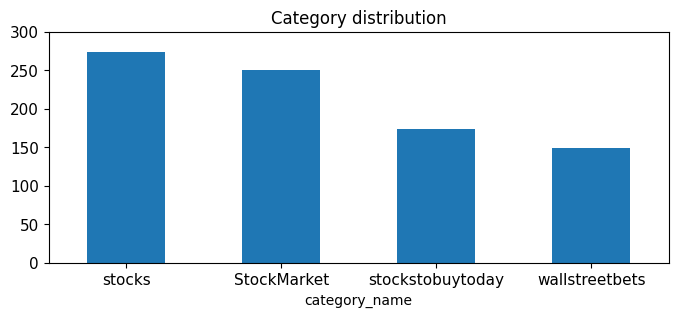

In [32]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
stocks              155
StockMarket         138
stockstobuytoday    115
wallstreetbets       92
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

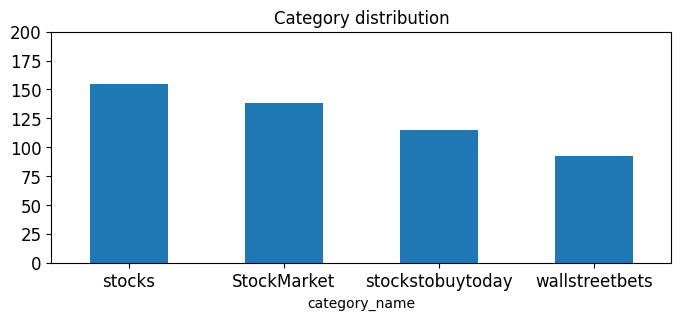

In [33]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 200], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### exercise 7
do not hardcoded the maximum value for y

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

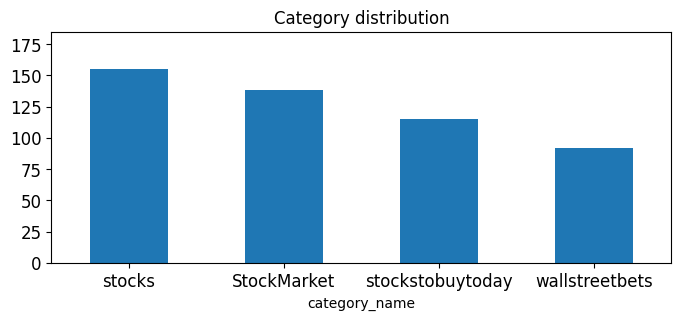

In [34]:
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max() + 30], 
                                           rot = 0, fontsize = 12, figsize = (8, 3))

### exercise 8
do a side-by-side comparison of the distribution between the two datasets

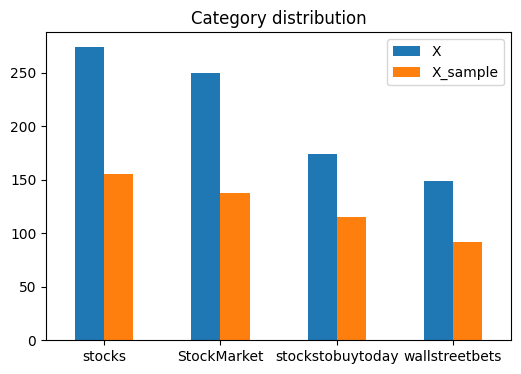

In [35]:
combined = X['category_name'].value_counts().rename("X").to_frame().join(
    X_sample['category_name'].value_counts().rename("X_sample").to_frame()
)

combined = combined.sort_values(by = "X", ascending = False)
combined.index.name = None

combined.plot(kind = 'bar', figsize = (6, 4))
plt.title('Category distribution')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right')
plt.show()

### 4.2 Feature Creation

In [36]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [38]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [39]:
X[0:4]

,text,label,category_name,unigrams
0,Calls on retards,-1.0,wallstreetbets,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,wallstreetbets,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,StockMarket,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,stockstobuytoday,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [40]:
list(X[0:2]['unigrams'])

[['Calls', 'on', 'retards'],
 ['Stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'No',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

### 4.3 Feature subset selection
generate a document-term matrix from the original dataset

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[1])

  (np.int32(0), np.int32(3696))	1
  (np.int32(0), np.int32(388))	1
  (np.int32(0), np.int32(2024))	2
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(4244))	1
  (np.int32(0), np.int32(1168))	1
  (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(1409))	1
  (np.int32(0), np.int32(2402))	1
  (np.int32(0), np.int32(538))	1
  (np.int32(0), np.int32(1083))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3628))	1
  (np.int32(0), np.int32(2161))	1
  (np.int32(0), np.int32(3848))	1
  (np.int32(0), np.int32(1568))	1
  (np.int32(0), np.int32(2878))	1
  (np.int32(0), np.int32(2645))	1
  (np.int32(0), np.int32(887))	1
  (np.int32(0), np.int32(3477))	1
  (np.int32(0), np.int32(1412))	2
  (np.int32(0), np.int32(3795))	1
  (np.int32(0), np.int32(2918))	1


In [42]:
count_vect.get_feature_names_out()[887]

'company'

In [43]:
count_vect.get_feature_names_out()[22]

'125'

In [44]:
count_vect.get_feature_names_out()[696]

'camps'

In [45]:
count_vect.get_feature_names_out()[17]

'11'

In [46]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### exercise 9
analyze the first record of our X dataframe with the new analyzer we have just built

In [47]:
analyze(X.text[0])

['calls', 'on', 'retards']

In [48]:
# We can check the shape of this matrix by:
X_counts.shape

(847, 4346)

In [49]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [50]:
# we convert from sparse array to normal array
X_counts[0:10, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [51]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### exercise 10
too sparse to find more non-zero, I would only like to look at the first non-zero of the 4th record

In [52]:
# Answer here
row = X_counts[3]
indices = row.nonzero()[1]  # non-zero column indices of the 4th record
sorted_indices = sorted(indices)

count_vect.get_feature_names_out()[sorted_indices[0]]

'116'

the number `3` in the 4th record is indeed located at index 18

In [53]:
print("indices: ", sorted_indices[0])

indices:  18


---

look at this nice little heat map of our term-document matrix

In [54]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [55]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [56]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

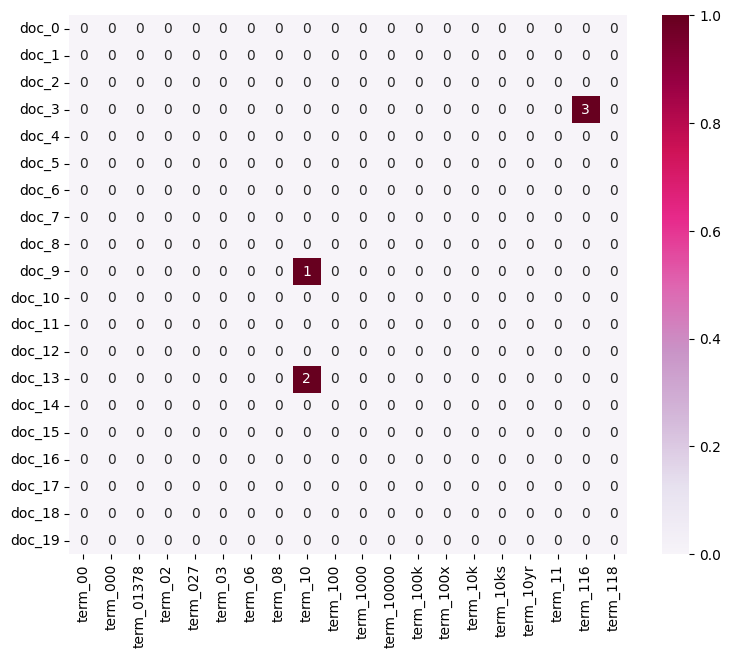

In [57]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### exercise 11
Try to modify the code above to plot the entire term-document matrix or just a sample of it, do this efficiently and get more non-zero.

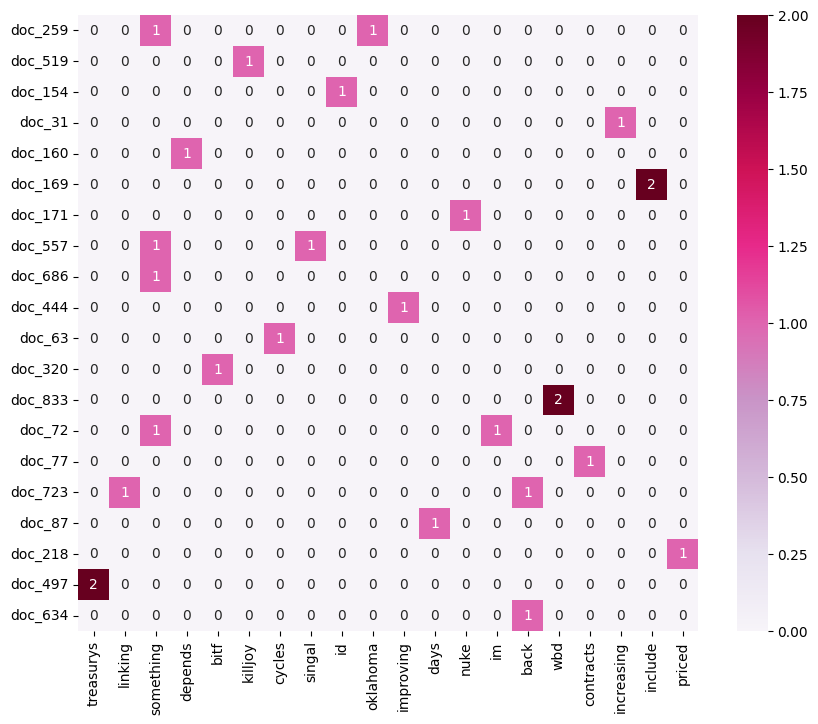

In [58]:
n_docs = 20
n_terms = 20

# randomly select terms
all_terms = np.arange(X_counts.shape[1])
terms_idx = np.random.choice(all_terms, n_terms, replace=False)

# ensure each term has at least one non-zero document
# so it can show more non-zero
docs_set = set()
for term in terms_idx:
    docs_with_term = X_counts[:, term].nonzero()[0]
    if len(docs_with_term) > 0:
        docs_set.add(np.random.choice(docs_with_term))

# if not enough documents, randomly select more
all_docs = np.arange(X_counts.shape[0])
while len(docs_set) < n_docs:
    docs_set.add(np.random.choice(all_docs))

docs_idx = list(docs_set)[:n_docs]

# build sub-matrix
plot_matrix = X_counts[docs_idx][:, terms_idx].toarray()
plot_x = count_vect.get_feature_names_out()[terms_idx]
plot_y = [f"doc_{d}" for d in docs_idx]

# draw
df_plot = pd.DataFrame(plot_matrix, columns = plot_x, index = plot_y)
plt.figure(figsize = (10, 8))
ax = sns.heatmap(df_plot,
                cmap = "PuRd",
                vmin = 0,
                vmax = df_plot.values.max(),
                annot = True, fmt = "d"
)


### 4.4 Attribute Transformation / Aggregation

####  4.4.1 Transform Text Data

In [59]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [60]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [61]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_82594/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


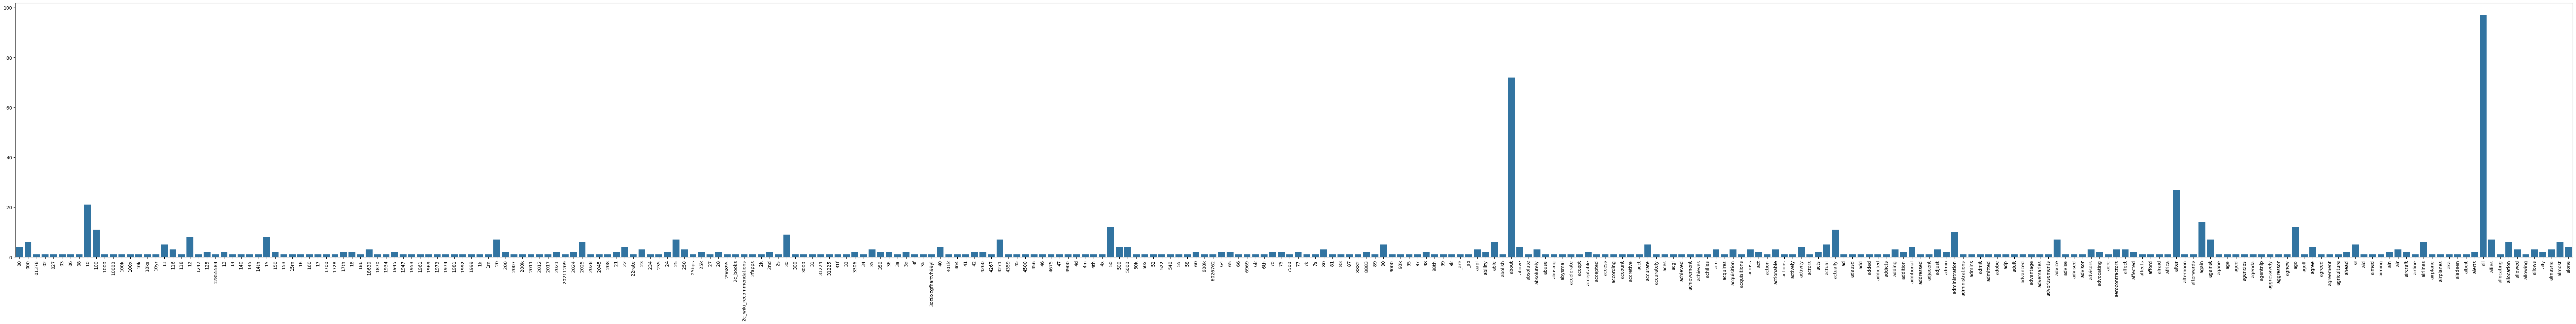

In [62]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### exercise 12
nicer interactive visualization

In [63]:
import plotly.express as px

# reference: https://plotly.com/python/plotly-express/
# first 300 terms and frequencies
term = count_vect.get_feature_names_out()[:300]

# plotly bar chart
fig = px.bar(x = term,
            y = term_frequencies[:300], 
            labels = {'x':'Term', 'y':'Frequency'}, 
            title = 'Term Frequency (first 300 terms)'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = term, # values on x-axis
    ticktext = term, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

### exercise 13
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. The below efficiently reduce the number of terms to visualize


In [64]:
terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# get threshold for top 3%
threshold = np.percentile(freqs, 97)

# select terms above threshold
indices = np.where(freqs >= threshold)[0]
top_terms = terms[indices]
top_freqs = freqs[indices]

# plot bar chart
fig = px.bar(
    x = top_terms,
    y = top_freqs,
    labels = {'x': 'Term', 'y': 'Frequency'},
    title = 'Top 3% Frequent Terms'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = top_terms, # values on x-axis
    ticktext = top_terms, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()


### exercise 14
sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaningful and you will be able to observe the so called long tail

In [65]:
terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# top 150 most frequent terms
top_n = 150
indices = np.argsort(freqs)[::-1][:top_n] # indices sorted freqs in ascending order, then reverse
top_terms = terms[indices]
top_freqs = freqs[indices]

# plotly bar chart
fig = px.bar(
    x = top_terms,
    y = top_freqs,
    labels = {'x': 'Term', 'y': 'Frequency'},
    title = f'Top {top_n} Terms by Frequency'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = top_terms, # values on x-axis
    ticktext = top_terms, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

we can also transform the values in that vector into the log distribution.  The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format.

In [66]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_82594/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



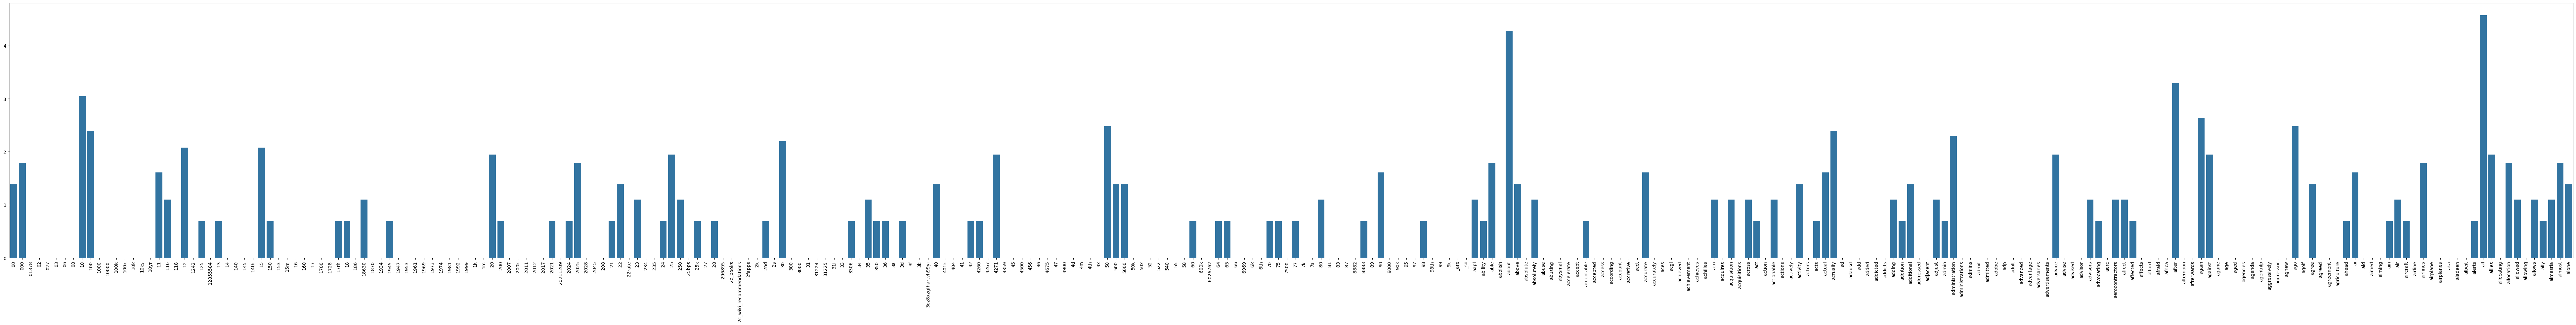

In [67]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### exercise 15
change the 'term_frequencies' variable for the 'term_frequencies_log'

In [68]:
term = count_vect.get_feature_names_out()[:300]

# plotly bar chart
fig = px.bar(x = term,
            y = term_frequencies_log[:300], 
            labels = {'x':'Term', 'y':'Log Frequency'}, 
            title = 'Log Term Frequency (first 300 terms)'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = term, # values on x-axis
    ticktext = term, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

# it is copy and modify from exercise 12, in that chart, it shows real counts, and small frequencies terms are not visible.
# by using log scale, small frequency terms are more visible because it reduces the gap between large and small values.
# so it is more suitable for visualizing overall distribution patterns.

## new dataset visualization (word cloud)

### before install wordcloud:
#### Activate the virtual environment
`source .venv/bin/activate`

#### Install pip if it is missing
`python -m ensurepip --upgrade`

In [69]:
import sys
!{sys.executable} -m pip install wordcloud


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


### Word Clouds with/without stopwords

In [70]:
from wordcloud import WordCloud

In [71]:
# Combine all text into one string
X_all_text = " ".join(X['text'].astype(str))

# word cloud of the whole text
X_wordcloud = WordCloud(width = 800, 
                        height = 400, 
                        background_color = 'white'
).generate(X_all_text)

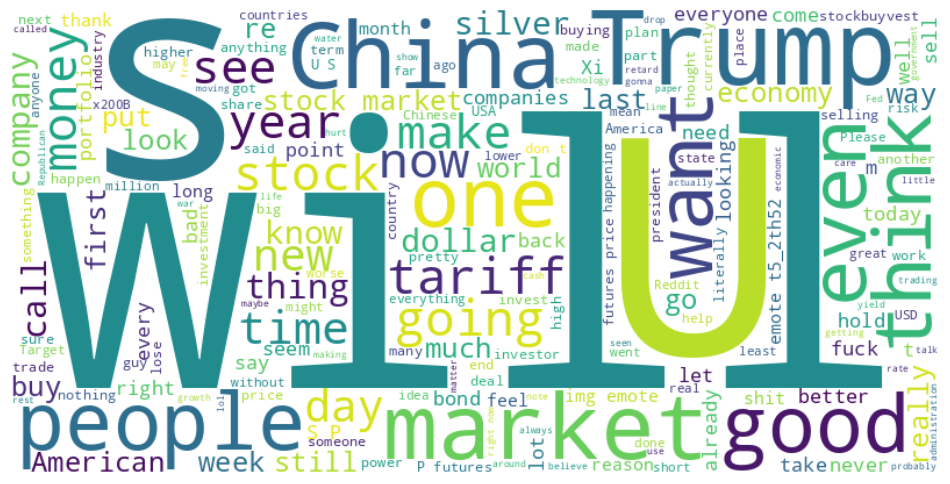

In [72]:
plt.figure(figsize = (12, 8))
plt.imshow(X_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [73]:
top_terms[0:50]

array(['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'for', 'this',
       'you', 'on', 'are', 'they', 'be', 'he', 'will', 'with', 'if', 'as',
       'market', 'but', 'not', 'so', 'have', 'all', 'us', 'just', 'was',
       'at', 'trump', 'my', 'what', 'can', 'like', 'we', 'or', 'has',
       'their', 'about', 'china', 'more', 'from', 'now', 'there', 'no',
       'by', 're', 'up', 'how'], dtype=object)

We can see that the largest terms in word cloud are *will*, *Trump*, *China*..., which do not match the results of `Top 150 Terms by Frequency bar chart` in exercise 14. 
In that bar chart, the most frequent words are "the", "to", "and", "is"... This is because the word cloud has built-in stopwords and automatically removes these words.


In [74]:
from wordcloud import STOPWORDS

STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

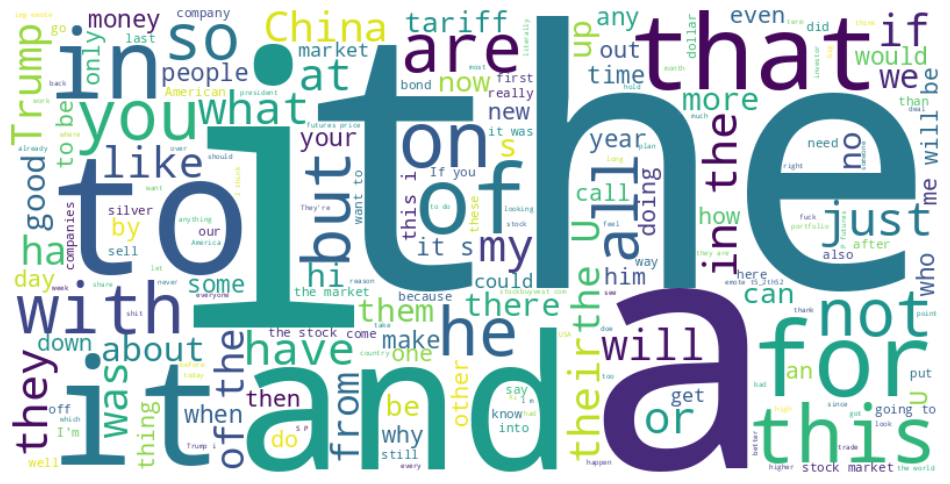

In [75]:
# word cloud of the whole text "without removing stopwords"
X_wordcloud_with_stopword = WordCloud(width = 800, 
                                    height = 400, 
                                    background_color = 'white',
                                    stopwords = set() # empty set
).generate(X_all_text)

plt.figure(figsize = (12, 8))
plt.imshow(X_wordcloud_with_stopword, interpolation = 'bilinear')
plt.axis("off")
plt.show()

We can see that the term `will` become smaller than before, and those high-frequency stopwords show up in this word cloud.

---

### Word Clouds Before and After Sampling

Compare the text before and after the sampling using word cloud (remove stopwords)

In [76]:
# Combine all text into one string
X_sample_all_text = " ".join(X_sample['text'].astype(str))

# word cloud of the sampled text
X_sample_wordcloud = WordCloud(width = 800, 
                               height = 400, 
                               background_color = 'white'
).generate(X_sample_all_text)

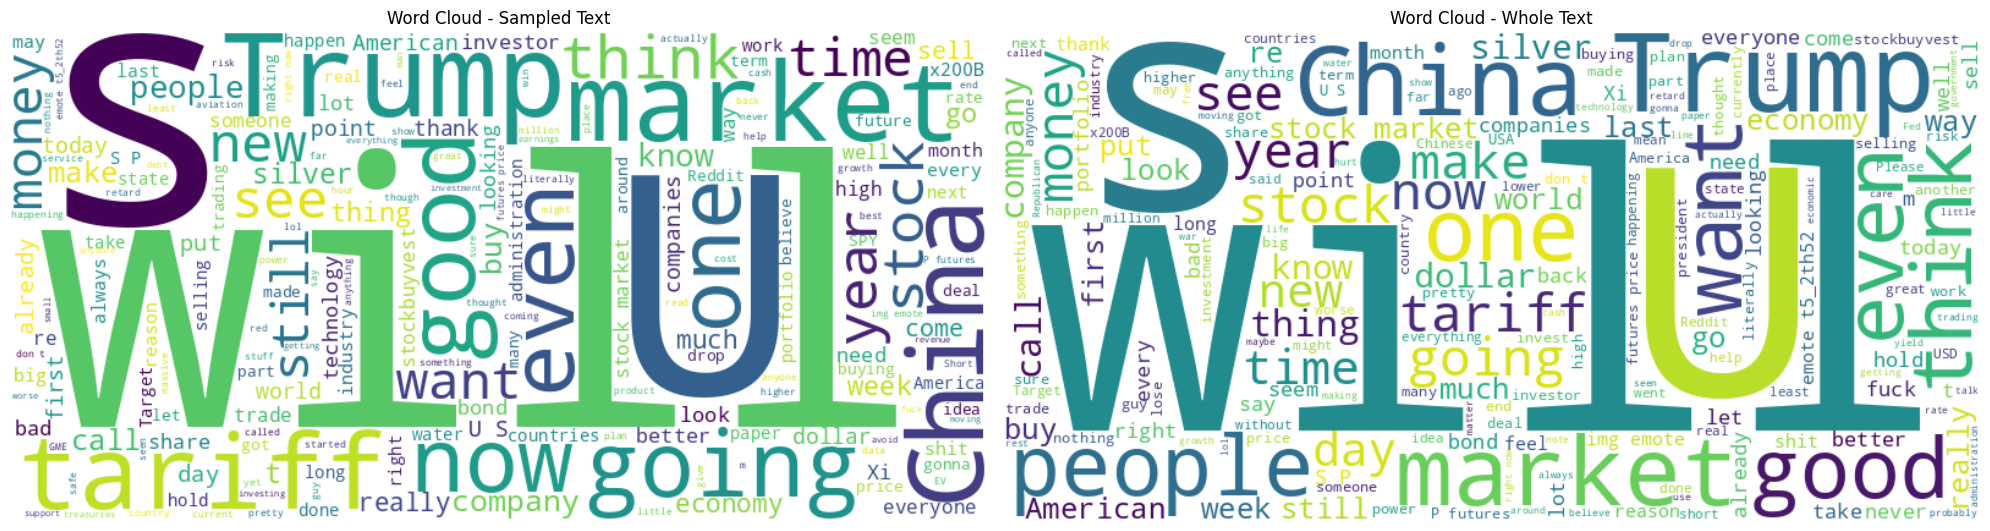

In [77]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

# word cloud of the sampled text
axes[0].imshow(X_sample_wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Word Cloud - Sampled Text")

# word cloud of the whole text
axes[1].imshow(X_wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Word Cloud - Whole Text")

plt.tight_layout()
plt.show()

These words show that the main discussion topics are about the U.S.-China trade war (Trump, China, tariff) and the financial market (market, stock, money, bond, silver, dollar). 
High-frequency terms (will, Trump, China, think, people) are less likely to disappear due to sampling. But low-frequency terms may differ more significantly before and after sampling so they may not appear in both word clouds.


---

### Exploring the Labels in the Dataset
Previously, we didn’t make use of the *label* column. Now, let’s take a look at it.


<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

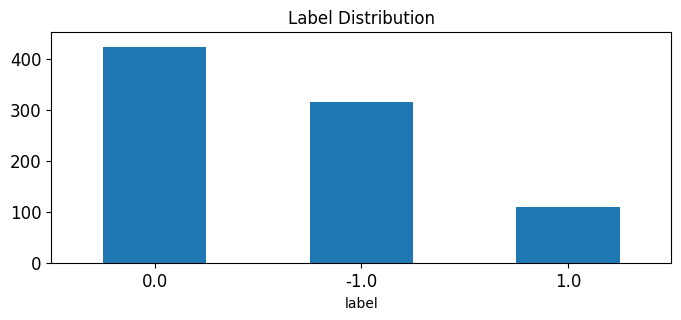

In [78]:
# label distribution
X['label'].value_counts().plot(
    kind = 'bar',
    title = 'Label Distribution',
    ylim = [0, X['label'].value_counts().max() + 30],
    rot = 0, fontsize = 12, figsize = (8, 3)
)

In [81]:
# the number of each label
label_counts = X['label'].value_counts()
print("label counts:")
print(label_counts)

label counts:
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


In [82]:
# some examples
print("\nexamples of positive texts:")
for text in X[X['label'] == 1.0]['text'].head(3):
    print("-", text)

print("\nexamples of neutral texts:")
for text in X[X['label'] == 0.0]['text'].head(3):
    print("-", text)

print("\nexamples of negative texts:")
for text in X[X['label'] == -1.0]['text'].head(3):
    print("-", text)


examples of positive texts:
- Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.  **Highlight Main Points**  * Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente. * The feat highlights the power of electric boating and pushes the limits of innovation. * Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.  **TLDR**  Hold onto your seats – Vision Marine Technologies Inc. and Shaun Torrente have shattered the water-speed record at an astonishing 116 mph!  This isn't just about speed; it's about pioneering electric boating and innovation. The collaboration of technology, skill, a

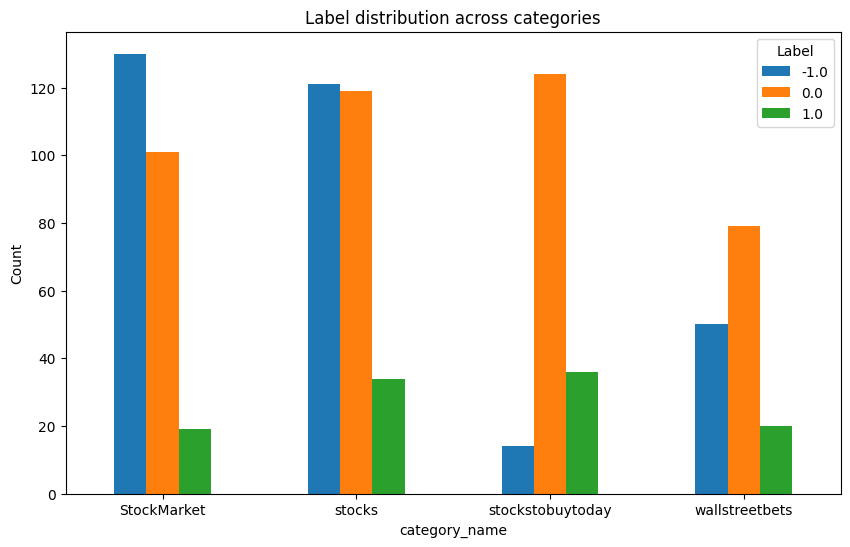

In [83]:
# label counts of each category_name
category_label_counts = pd.crosstab(X['category_name'], X['label'])

category_label_counts.plot(
    kind = 'bar',
    figsize = (10, 6) 
)

plt.title("Label distribution across categories")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.legend(title = "Label", loc = "upper right")
plt.show()

`StockMarket` and `stocks` have the most negative labels.
`stockstobuytoday` is dominated by neutral, show a more neutral discussion.
`wallstreetbets` has both neutral and negative labels in large numbers.

the discussions are mostly critical or neutral

---

### word cloud of three label
observe the key terms under each sentiment

In [84]:
def plot_wordcloud_by_label(data, label_value, title):
    text_data = " ".join(data[data['label'] == label_value]['text'].astype(str))
    wc = WordCloud(width = 800, height = 400, background_color = 'white').generate(text_data)

    plt.figure(figsize = (12, 8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(title, fontsize = 20)
    plt.show()

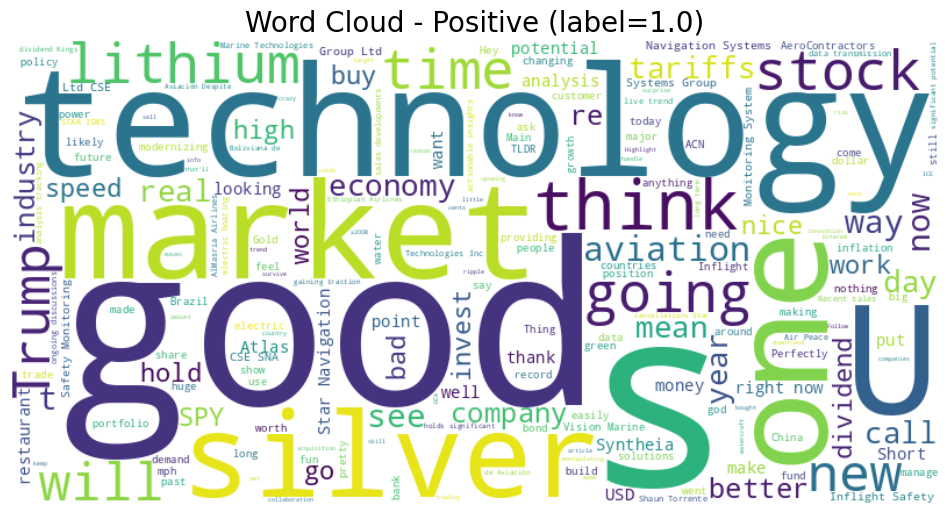

In [85]:
plot_wordcloud_by_label(X, 1.0, "Word Cloud - Positive (label=1.0)")

In positive word cloud, it shows positive sentiment such as `good,` `better`, `nice`, and `thank`. There are also words like `buy`, `invest`, `work`, `going`, and `think`, which may further suggest forward-looking, and shows confidence and optimism.


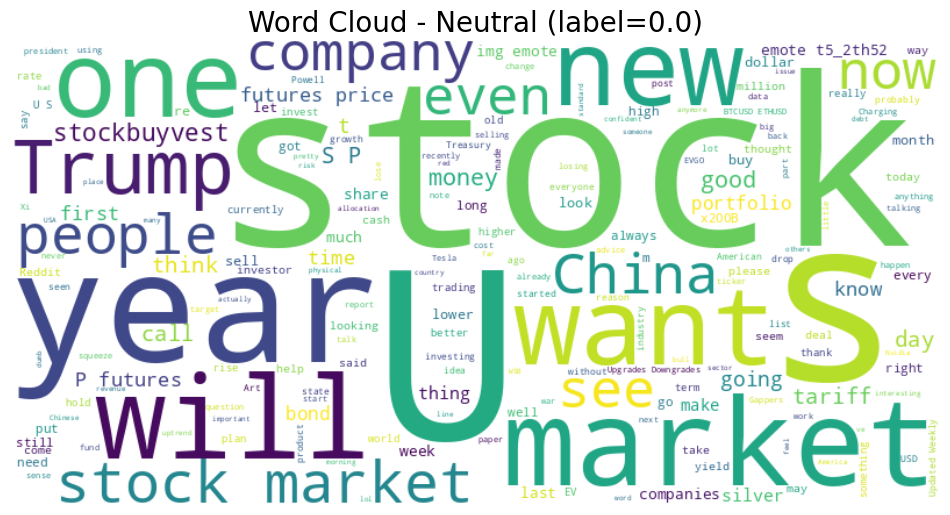

In [86]:
plot_wordcloud_by_label(X, 0.0, "Word Cloud - Neutral (label=0.0)")

In neutral word cloud, the most frequent terms are `stock`, `market`, `year`, `company`, which usually reflect factual discussions. 
Most of the terms report or describe economy rather than express attitudes.

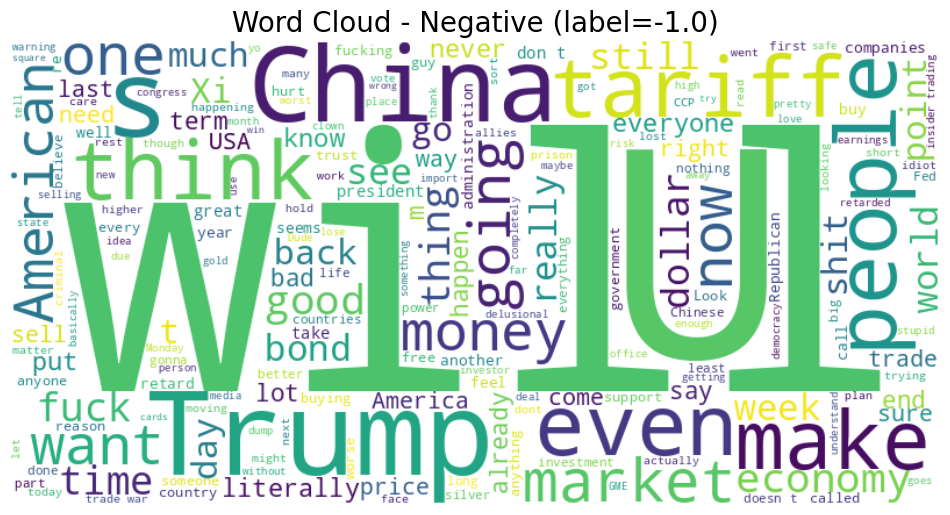

In [87]:
plot_wordcloud_by_label(X, -1.0, "Word Cloud - Negative (label=-1.0)")

In the negative word cloud, the terms show concerns. Words like `tariff`, `Trump`, `China` and `trade` emphasize the U.S.-China trade war.
`money` and `dollar` appear larger compared to the other two word clouds, financial worries may exist in some dicussion.
Negative expressions like `bad`, `loss`, `fuck` reflect dissatisfaction.
The term `will` appears especially large, which may indicate concerns about what will happen in the future.


# Phase 2

In [198]:
### Begin Assignment Here